# Predicting Female And Male Online Shoppers

## STEPS:



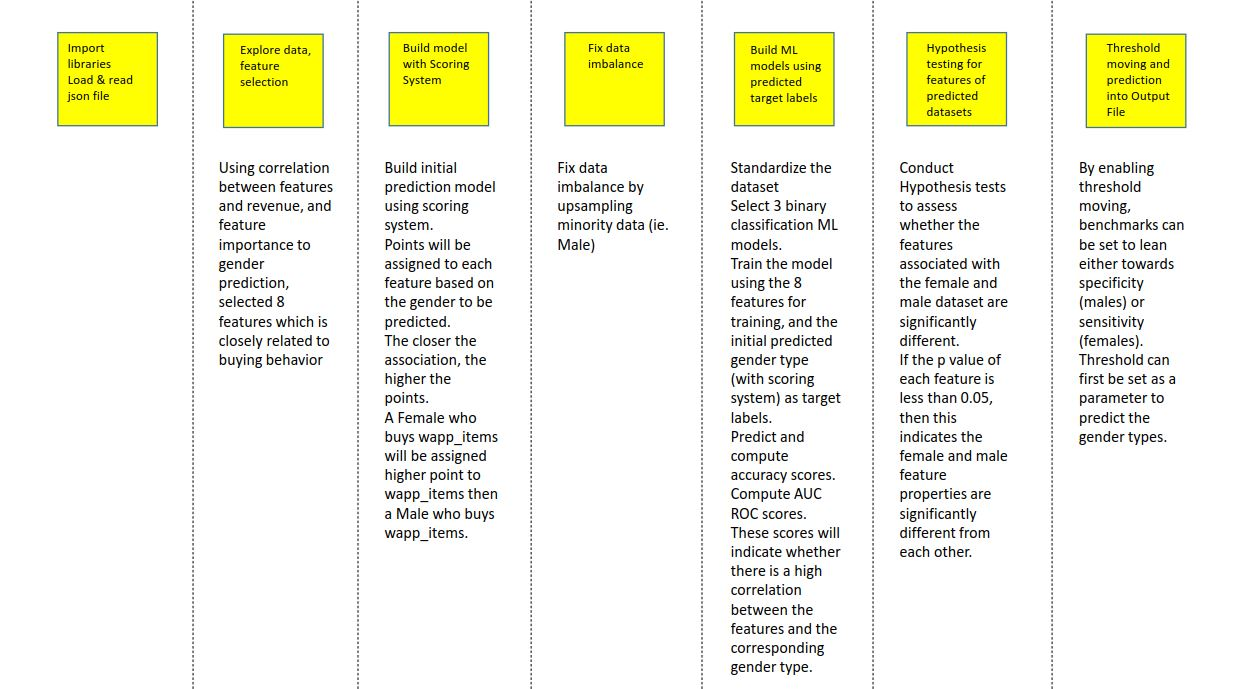


### Import python libraries, load and read csv file
1. import python libraries
2. load and read json file (provided)
3. save file in csv format for reload
4. load csv file and assign to df

### Explore data and feature selection
5. explore the features
6. explore the correlation between all features and revenue, ranking from the largest correlation to the smallest
7. select 8 features out of all features, without re-engineering

### Build initial prediction model with scoring system
8. using a scoring system, assign points to these features depending on the gender type we are predicting
9. build the initial model using the scoring system and run the model to predict female(1) or male(1) to every row
10. visualize the proportion of predicted gender types using a PIE chart

### Fix imbalanced data 
11. as the number of female and male shoppers are disproportionately imbalanced, it is necessary to fix the imbalance
12. fix the imbalance by upsampling the number of male shoppers to match female shoppers

### Build ML model using the initial predicted labels
13. import binary classifiers libraries ie. LogisticRegression, XGBoost and Random Forest to build ML models

#### Standardize dataset, train dataset, compute accuracy scores and AUC scores
14. standardize the dataset
15. train the ML models using the 8 features with predicted gender types
16. predict gender types with ML models and compute accuracy scores
17. compute AUC scores

#### Predict gender types using all 3 models and visualize the proportion using PIE chart
18. predict gender types for every row using ML models
19. visualize the proportion of gender types using PIE chart

### Hypothesis testing to prove dataset by gender are significantly different from each other
20. conduct Hypothesis testing to prove all 8 feature properties associated with female and male gender are significantly different
21. Null Hypothesis: female and male feature properties are similar indicating the separation is not well done
22. Alternative Hypothesis: female and male feature properties are significantly different indicating separation is well done
23. Visualize the distribution of the 8 features based on gender types using distribution plot

### Create function to enable prediction with threshold adjustments
24. create a function to enable threshold moving to mitigate high risks of misclassification of gender types
25. plot the line graph to visualize the number of females and males predicted for each threshold (between 0 to 1)
26. create a function to predict gender types using threshold as a parameter and visualize with PIE chart





## Explanation:

### Feature Selection
1. Since the purchasing behavior is closely related to gender types, I have selected the following features: 'wapp_items', 'wacc_items','wftw_items','mapp_items','macc_items','mftw_items','unisex_items', 'sprt_items'. 
2. I have not selected 'female_items' because this is the summation of 'wapp_items', 'wacc_items','wftw_items'.
3. I have not selected 'male_items' because this is the summation of 'mapp_items','macc_items','mftw_items'.
4. I have not used any other re-engineered features but the as-is features.

### Initial prediction model using scoring system
1. I have assigned different points to each 8 features depending on gender types
2. Closer association between gender type and the feature will be assigned higher points
3. For instance, a female who buys wapp_items will be assigned higher points than a male who buys wapp_items
4. For each row, females will be assigned points in this manner:
    Female buys -
    wapp_items: 1 point (this is normal behavior)
    wacc_items: 1 point (this is normal behavior)
    wftw_items: 1 point (this is normal behavior)
    mapp_items: 0.5 point (this is highly unlikely behavior, so 0.5 point is given)
    macc_items: 0.8 point (this is more likely, so 0.8 point is given)
    mftw_items: 0.8 point (this is more likely, so 0.8 point is given)
    unisex_items: 1 point (this is normal behavior)
    sprt_items: 1 point (this is normal behavior)
    
    Male buys -
    wapp_items: 0.5 point (this is highly unlikely behavior, so 0.5 point is given)
    wacc_items: 0.8 point (this is more likely, so 0.8 point is given)
    wftw_items: 0.8 point (this is more likely, so 0.8 point is given)
    mapp_items: 1 point (this is normal behavior)
    macc_items: 1 point (this is normal behavior)
    mftw_items: 1 point (this is normal behavior)
    unisex_items: 1 point (this is normal behavior)
    sprt_items: 1 point (this is normal behavior)
    
5. For every row, the following calculation of multiplication and addition are carried out for female and male, and recorded in female column as df1['gender_1'] and in male column as df1['gender_0']:
    For Female -
    (wapp_items x 1) + (wacc_items x 1) + (wftw_items x 1) + (mapp_items X 0.5) + (macc_items x 0.8) + (mftw_items x 0.8) + 
    (unisex_items x 1) + (sprt_items x 1) = total points for this row
    
    For Male - 
    (wapp_items x 0.5) + (wacc_items x 0.8) + (wftw_items x 0.8) + (mapp_items X 1) + (macc_items x 1) + (mftw_items x 1) + 
    (unisex_items x 1) + (sprt_items x 1) = total points for this row
    
6. To predict whether that particular row is a Female or Male, I compared the 'total points for this row'. If the higher point belongs to Female, then that row will be predicted as Female and vice versa for Male.

## Proving The Prediction Is Accurate (3 methods)
1. In order to prove that the prediction is correct, I built ML models with the following:
    a. Logistic Regression
    b. XGBoost
    c. Random Forest
    
### Compute accuracy scores with ML models:
2. I standardized the datasets, trained the model, and predicted with accuracy scores.  
3. The accuracy score will show whether there is indeed a correlation between the features and the target labels (Female(1) or Males(0)).  The scores are as follows:
            Logistic Regression: 0.996
            Random Forest: 0.999
            XGBoost: 0.999
4. These accuracy scores show a high correlation between the selected features and the predicted gender. The scores are computed with cross_val_score function obtaining an average score using cross validation of 5.

### Compute AUC scores with ML models:
5. I have used AUC scores to assess whether the ML models have done well in separating female and male in the dataset. 
          The scores are as follows:
            Logistic Regression: 0.999
            Random Forest: 1.0
            XGBoost: 1.0
For instance Random Forest has a probability of 1.0 in correctly separating female from male in the dataset. Logistic Regression has a probability of 0.999. This indicates that the ML models have done well in separating the dataset into their respective gender types.  It also proves that the initial model used to separate them is good.
    
### Use Hypothesis testing to prove that the separated female and male datasets are significantly different from each other.
6.  The results of the hypothesis testing shows that for all the 8 features, the female and male data are significantly different from each other with p values less than 0.05 (for all 8 features).  Therefore I will reject the null hypothesis that the data from both gender types are similar. This indicates that the data are separated correctly into their respective gender types. ie (females(1) and males(0)).

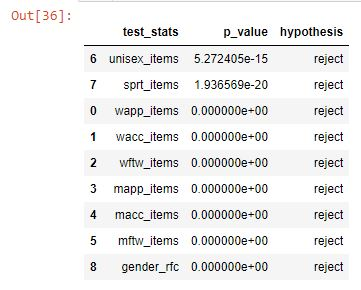

## Enable Threshold Moving To Predict Gender Types
1. Depending on the cost of misclassification, threshold moving will allow adjustment to favor either greater specificity (males) or sensitivity (females) in the results.
2. From the initial results of proportion between total 'female_items' vs 'male_items' (84.2%/15.8%), we find a huge disproportionate imbalance in favor of female. We infer that female shoppers make up a huge proportion. 
3. It is not surprising that moving the threshold will yield little differential results. Nevertheless, the function of shifting the threshold has been enabled in this ML model.
4. The function; [predict_gender(X_origin, sample, model, threshold, model_name)] will enable prediction of gender types into a table, and visualized in a PIE Chart (results). (In the codes, 0.5 is used as a threshold parameter value).

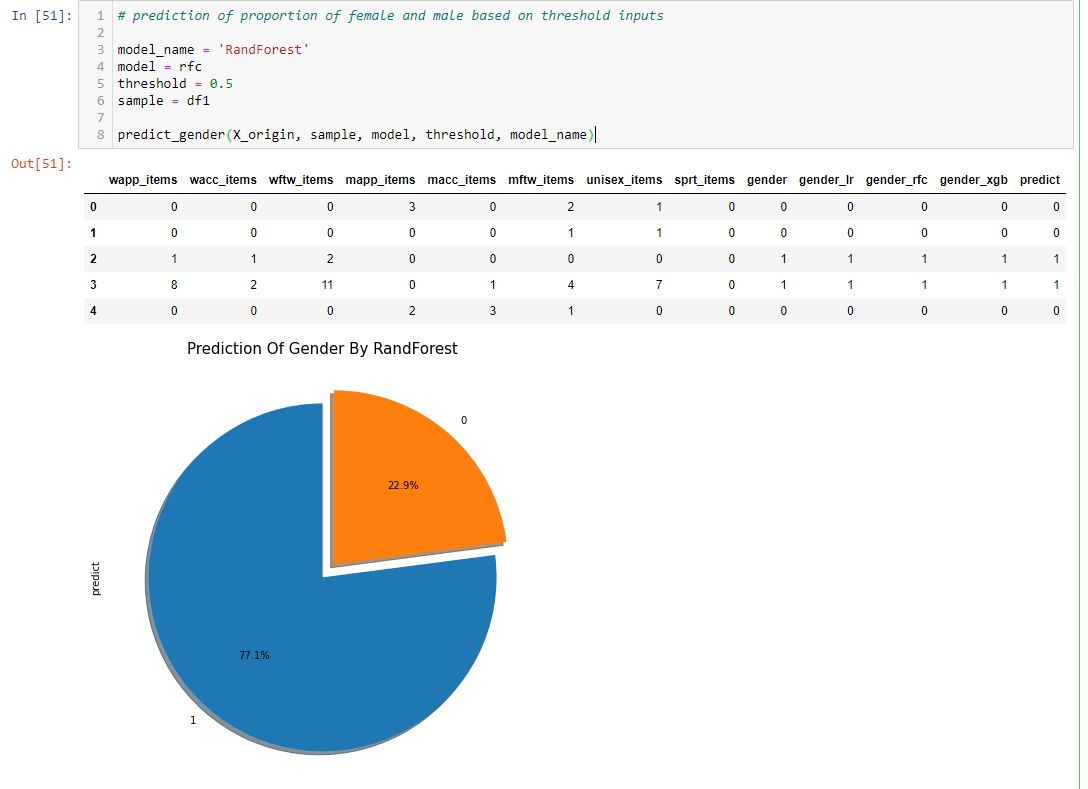



## What are the features used in the prediction? And the logic behind the calculation.
1. The features used in the prediction are: 'wapp_items','wacc_items','wftw_items','mapp_items','macc_items','mftw_items','unisex_items', 'sprt_items'.
2. When you walk into a physical store selling ladies clothes, you can see that most shoppers are females.  In addition, most of the female apparels are also purchased by these female shoppers.  Likewise a store selling men's clothes will find more men than women browsing the men's apparels in these stores.  Therefore apparels is one of the main features which predicts the gender types.
3. However for accessories, you can find a greater mixture of female and male shoppers in a physical shop.  This is because a female shopper can buy a men's accessories say a tie pin for her husband or for a colleague as birthday gift. Vice versa for a man can be seen buying a women's accessory say scarf as a gift because it is not as personal as an apparel where greater detail into the personal preferences (such as design and sizes) have to be considered.
4. Therefore points are assigned to these categories depending on whether we are predicting female or male users.  More points will be assigned to women's apparels when we are predicting female users who buys women's apparels (because it is more likely for a female to purchase women's apparels).  Less points are assigned when predicting male users who buys women's apparels (because it is less likely for a male to purchase women's apparels).
5. As for unisex and sport items, you can find the line between female and male begins to 'blur' even more.  Therefore for these 2 categories, the same points will be assigned regardless whether i am predicting a female or male user.
6. The other features such as different shipping addresses used, the number of times different addresses are used during buying does not really indicate whether the user is a female or male. A user who uses different shipping addresses allow me to infer that the user has been renting instead of having his own apartment, and therefore suggest that this user is more likely to be single. But this does not help us infer whether this is a female or male.
7. Features relating to payment modes such as credit card, paypal or Afterpay does not help infer whether the user is either female or male.  If you look into a wallet of a friend of either gender types, you will find the same stuff ie. Credit cards etc and most of them have paypal accounts linked to these credit cards. Besides, if anyone buys online, you will definite use credit card payments.  
8. There is another feature known as devices which indicates the number of unique devices used to order items online.  These devices likely belong to the user and not borrowed; because if the user keys in credit card details in a borrowed device, the details may be captured in that borrowed device.  Therefore a user with many devices indicates an affluent user who owns many devices but does not help infer gender types.
9. However if the user uses a lot more mobile site than desktop, this may infer that the user is socially active and more savvy regarding fashion trends.  But still this does not help infer gender types.
10. For features relating the home orders vs work orders, a user who has many orders been shipped to work indicates that this user spents a lot of time at the workplace and there are nobody at home. This may help infer that the user is likely to be single.  A user who has many orders shipped to home indicates that this user is likely to live with family members or is married with children. For a user who has many orders shipped to parcel points may indicate that the user values her/his own privacy away from the prying eyes of family members or fellow tenants.  But these 3 features (work orders, home orders, parcel point orders) does not help infer gender types
11. Similarly for operating system in devices such as android and ios, there is no trend which indicates either gender favouring one operating system type in favour of another.  Therefore this feature does not help infer gender types.
12. Finally, there are 2 more features namely vouchers and coupon discount applied.  A female can use these to obtain discounted prices to buy women's apparels or men's apparels.  A male can use that as well to buy women's apparels or men's apparels at a discount as well.  Therefore these 2 features does not help infer gender types.




## Output File
1. The output file consists of the original csv file (df) with a new column "predict_gender" added. 
2. Female (1), Male (0)
2. The prediction used Random Forest Classifier.

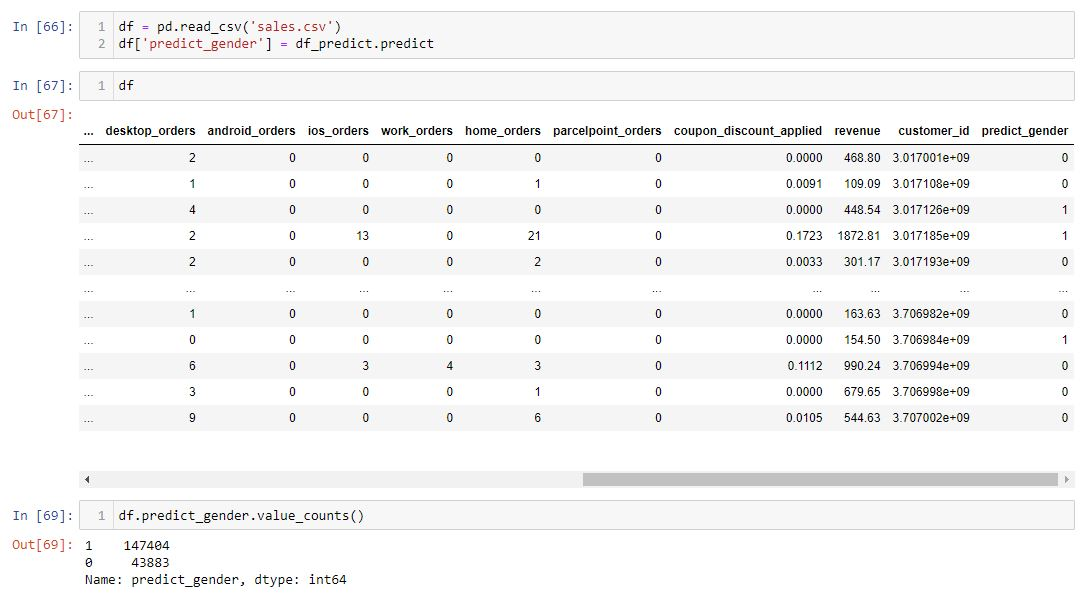


## Suggest 5 new features
1. Additional Features associated with online navigation behaviours will help us infer gender types.
2. These are:
3. Tracking user navigation patterns by site category (page),
4. and duration of each visit (for instance if a user spends a lot time in the dress section, high probability this is a female).
5. Include 'LIKE' button (for each product) which will be captured in the basket of wishlist.
6. Enable product reviews which can capture customer gender.



## How accurate is the prediction?
1. Accuracy is 0.999
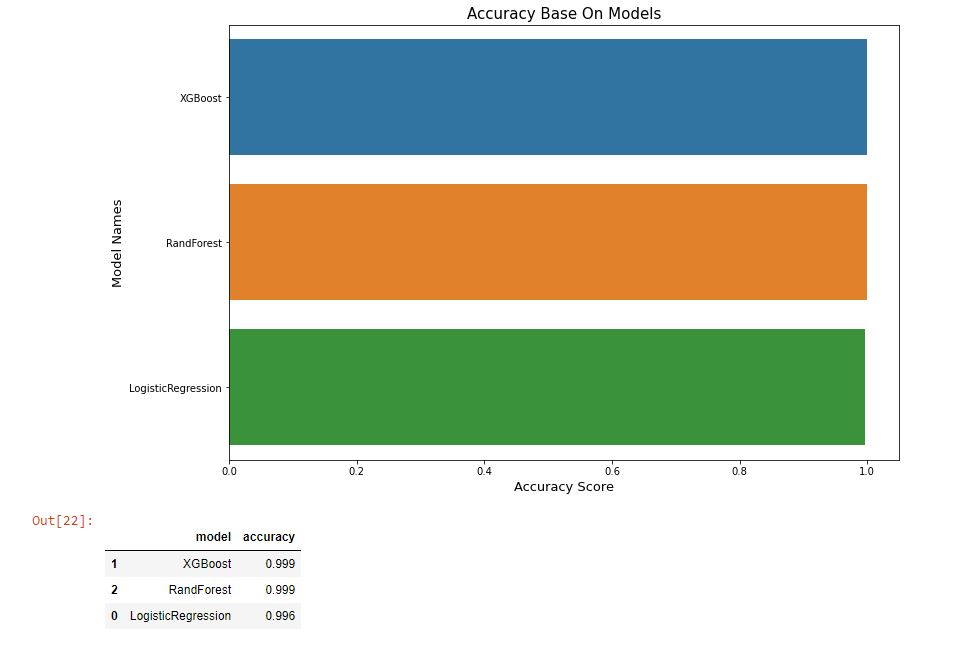


## Executive Summary
1. The features in the  dataset focus a lot on buying behavior, of which 8 of them can be used to infer gender types
2. From the initial prediction, verified with ML models (accuracy and AUC scores) and Hypothesis testing, we can infer that approximately 80% of the users are females
3. New features focusing on site navigation behaviour will allow us to understand how to improve the product offering further and/or site menus.  For example, if the average time duration spent on a certain category (pages) is little as compared to the others, this may indicate that there is still room for improvement either on product offering or website design.  The average time duration can also be used as a measurement of how well it is doing after a revamp in product offering or website design.
4. New features can also include greater detail into each category.  For example wapp_items can also include new features such as dressers, pants or skirts.  Studying buying behavior and navigation behavior into these features will give greater insights into gender types of the users.

### Import python libraries, load and read csv file

In [1]:
# import python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# assign file to 'filename'

filename = 'Senior DA test.json'

In [3]:
# read json file

with open(filename) as f:
    data = f.readline()
cleaned_data = data[2:-3]
replaced_data = cleaned_data.replace("\\", "")
df = pd.read_json(replaced_data)
df.head()

,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,returns,different_addresses,shipping_addresses,devices,vouchers,...,msite_orders,desktop_orders,android_orders,ios_orders,work_orders,home_orders,parcelpoint_orders,coupon_discount_applied,revenue,customer_id
0,2783,1487,N,2,5,0,0,2,1,0,...,0,2,0,0,0,0,0,0.0000,468.80,3.017001e+09
1,2772,1296,N,1,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0.0091,109.09,3.017108e+09
2,2773,1929,N,4,4,0,0,2,1,0,...,0,4,0,0,0,0,0,0.0000,448.54,3.017126e+09
3,2767,6,Y,23,36,3,0,3,3,13,...,8,2,0,13,0,21,0,0.1723,1872.81,3.017185e+09
4,1430,826,N,2,6,0,0,2,1,0,...,0,2,0,0,0,2,0,0.0033,301.17,3.017193e+09


In [4]:
# write to file in csv format to load later

df.to_csv('sales.csv', index=False)


In [5]:
# Load csv and assign to df

df = pd.read_csv('sales.csv')

### Explore data and feature selection

In [6]:
# check columns

df.columns

Index(['days_since_first_order', 'days_since_last_order',
       'is_newsletter_subscriber', 'orders', 'items', 'returns',
       'different_addresses', 'shipping_addresses', 'devices', 'vouchers',
       'cc_payments', 'paypal_payments', 'afterpay_payments', 'female_items',
       'male_items', 'unisex_items', 'wapp_items', 'wftw_items', 'mapp_items',
       'wacc_items', 'macc_items', 'mftw_items', 'sprt_items', 'msite_orders',
       'desktop_orders', 'android_orders', 'ios_orders', 'work_orders',
       'home_orders', 'parcelpoint_orders', 'coupon_discount_applied',
       'revenue', 'customer_id'],
      dtype='object')

In [7]:
# exploring features which contributes the most to revenue change. 'male_items', 'macc_items', 'mapp_items',
# 'mftw_items' contribute little to revenue

df.corr().revenue.sort_values(ascending=False)

revenue                    1.000000
items                      0.927191
female_items               0.912194
wapp_items                 0.906387
orders                     0.848901
returns                    0.834986
home_orders                0.792779
cc_payments                0.767551
wacc_items                 0.718841
wftw_items                 0.707272
desktop_orders             0.656600
vouchers                   0.619656
paypal_payments            0.580928
ios_orders                 0.562144
unisex_items               0.560514
msite_orders               0.478651
sprt_items                 0.420182
devices                    0.398370
afterpay_payments          0.387563
work_orders                0.382705
macc_items                 0.381143
male_items                 0.370527
mapp_items                 0.350845
mftw_items                 0.331197
different_addresses        0.229082
shipping_addresses         0.214938
parcelpoint_orders         0.171364
android_orders             0

In [8]:
# 'female_items' are made up of these 3 items: ['wapp_items','wacc_items','wftw_items']

df.loc[113,['female_items','wapp_items','wacc_items','wftw_items','unisex_items','sprt_items']]

female_items    7
wapp_items      6
wacc_items      0
wftw_items      0
unisex_items    0
sprt_items      0
Name: 113, dtype: object

In [9]:
# 'male_items' are made up of these 3 items: ['mapp_items','macc_items','mftw_items']

df.loc[121,['male_items','mapp_items','macc_items','mftw_items','unisex_items','sprt_items']]

male_items      20
mapp_items       7
macc_items      13
mftw_items       0
unisex_items     1
sprt_items       0
Name: 121, dtype: object

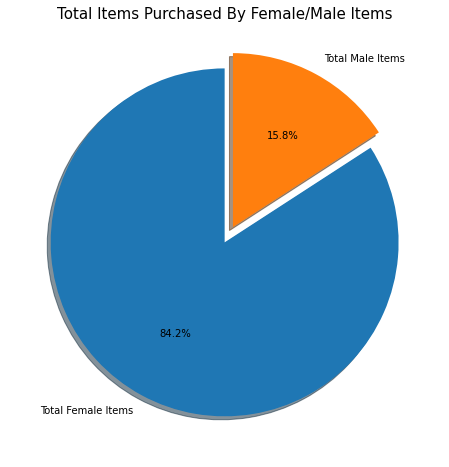

In [10]:
# Explore total items purchased according to  Female/Male Items. Total Male Items is only 15% of total purchase
# as compared with Female Items

total_female_items = df.female_items.sum()
total_male_items = df.male_items.sum()

plt.figure(figsize=(8,8))
explode=[0,0.1]
label = ['Total Female Items','Total Male Items']
p = [total_female_items,total_male_items]
plt.pie(p, labels=label, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)
plt.title('Total Items Purchased By Female/Male Items', fontsize=15);

In [11]:
# features for predicting gender.  WE DO NOT INCLUDE 'female_items' and 'male_items' as these are counted under 
# ['wapp_items', 'wacc_items','wftw_items','mapp_items','macc_items','mftw_items']

df = df[['wapp_items', 'wacc_items','wftw_items','mapp_items','macc_items','mftw_items',\
         'unisex_items', 'sprt_items']]

df1 = df.copy()

### Build initial prediction model with scoring system

In [12]:
# based on scoring system, we allocate points to each of the 8 features depending on whether it is female or male

f_list, m_list = list(), list()
for wp, wc, wt, mp, mc, mt, ux, sp in zip(df.wapp_items, df.wacc_items, df.wftw_items, \
                                                      df.mapp_items, df.macc_items, df.mftw_items, \
                                                      df.unisex_items, df.sprt_items):
    

    f_list.append(wp*1 + wc*1 + wt*1  + mp*0.5 + mc*0.8 + mt*0.8 + ux*1 + sp*1 )
    m_list.append(wp*0.5 + wc*0.8 + wt*0.8  + mp*1 + mc*1 + mt*1 + ux*1 + sp*1 )
    
df1['gender_0'] = m_list
df1['gender_1'] = f_list

df1['gender_diff'] = df1['gender_1'] - df1['gender_0'] 
    
df1['gender'] = [1 if i > 0 else 0 for i in df1['gender_diff']]
                
df1 = df1.drop(['gender_0', 'gender_1','gender_diff'], axis=1)

In [13]:
# The summary of the counts: female(1) = 147,392; and male(0) = 43,895

df1.gender.value_counts()

1    147392
0     43895
Name: gender, dtype: int64

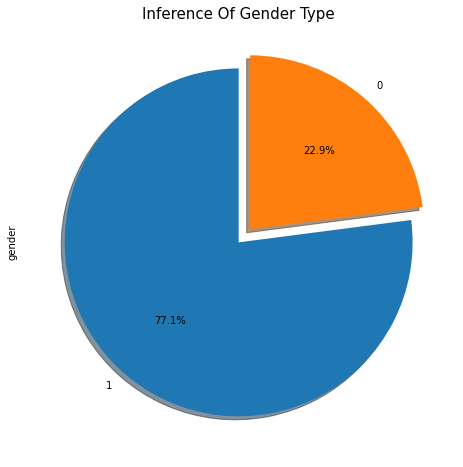

In [14]:
# Visualising the proportion of female(1) and male(0) online shoppers 22.9% / 77.1%, 
# Not that different from the proportion of 15.8% / 84.2% for total number of items purchased. 

plt.figure(figsize=(8,8))
explode=[0,0.1]
df1.gender.value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=90, explode=explode)
plt.title('Inference Of Gender Type', fontsize=15);



In [15]:
df1.head()

,wapp_items,wacc_items,wftw_items,mapp_items,macc_items,mftw_items,unisex_items,sprt_items,gender
0,0,0,0,3,0,2,1,0,0
1,0,0,0,0,0,1,1,0,0
2,1,1,2,0,0,0,0,0,1
3,8,2,11,0,1,4,7,0,1
4,0,0,0,2,3,1,0,0,0


In [16]:
# initialise binary classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

lr = LogisticRegression()
rfc = RandomForestClassifier()
xgb = XGBClassifier()

### Fix imbalanced data 

In [17]:
# To fix imbalanced data, import resample
from sklearn.utils import resample

# separating female and male datasets
gender_1_value_counts = df1['gender'].value_counts().iloc[0]
gender_1_df = df1[df1['gender']==1]
gender_0_df = df1[df1['gender']==0]

# upsampling of number of male shoppers to match number of female shoppers
gender_0_df1_resampled = resample(gender_0_df, n_samples = gender_1_value_counts, replace=True )

# concatenating female and male dataset
df_resampled = pd.concat([gender_1_df, gender_0_df1_resampled])
df_resampled = df_resampled.reset_index(drop=True)

# review shape of concatented dataset
df_resampled.shape

(294784, 9)

In [18]:
# review the shape of individual gender datasets

df_resampled.gender.value_counts()

0    147392
1    147392
Name: gender, dtype: int64

In [19]:
# select the 8 features of concatenated dataset and assign to X & y

X = df_resampled[['wapp_items', 'wacc_items','wftw_items','mapp_items',\
                   'macc_items','mftw_items','unisex_items', 'sprt_items']]
y = df_resampled.gender

## Proving The Prediction Is Accurate

In [20]:
# import metrics and libraries to measure accuracy of prediction

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

In [21]:
# define a function to standardize data and output to a dataframe
from sklearn.preprocessing import StandardScaler
def normal(X):
    sc = StandardScaler()
    _ = sc.fit_transform(X)
    X = pd.DataFrame(data=_, columns=X.columns)
    return X


# define function to output accuracy scores of model predictions
def accuracy_score(mymodels, model_names):
    addup = list()
    for m, n in zip(mymodels, model_names):
        
        acc = round(np.mean(cross_val_score(m, normal(X), y,scoring='accuracy', cv=5)),3)
        cast = {'model': n, 'accuracy': acc}
        addup.append(cast)
        
    return pd.DataFrame(data=addup, columns=['model','accuracy'])


# define function to plot the AUC curve for the models
total = []
def auc_score(mymodels,model_names):
    _=normal(X)
    X_train, X_test, y_train, y_test = train_test_split(_,y, test_size=0.3, random_state=2)
    h=1
    for model_1, name in zip(mymodels, model_names):
        model_1.fit(X_train, y_train)
        y_preds = model_1.predict_proba(X_test)[:, 1]
        auc = round(roc_auc_score(y_test, y_preds),3)
        cast = {'model': name, 'auc score': auc}
        total.append(cast)
        
        # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
        fpr, tpr, thresholds  = roc_curve(y_test, y_preds)

        # Store the Area Under the Curve (AUC) so we can annotate our graph with the metrics
        roc_auc = metrics.auc(fpr, tpr)
        #auc = roc_auc_score(y, y_preds)

        # Plot the ROC Curve
        
        plt.figure(figsize=(12,55))
        plt.subplot(8,1,h)
        lw = 2
        plt.plot(fpr, tpr, color='red', lw = lw, label = 'ROC curve (area = %0.3f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"ROC Curve {name}")
        plt.legend(loc = "lower right")
        plt.show()
        h+=1
    
    
    # compute the dataframe known as'classifier'
    classifier = pd.DataFrame(data=total, columns=['model','auc score'])
    order= classifier.sort_values('auc score', ascending=False).model
    classifier = classifier.sort_values('auc score', ascending=False)
    
    # plot 'classifier' barplot
    plt.figure(figsize=(12,8))
    sns.barplot(data=classifier, x='auc score', y='model', order=order)
    plt.title('Measure Of Classifier Effectiveness', fontsize=20)
    plt.xlabel('AUC Score', fontsize= 18)
    plt.ylabel('Model Names', fontsize= 18)
    
    # return classifier dataframe
    return classifier

### Using accuracy scores with ML models to assess accuracy of prediction:

[08:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

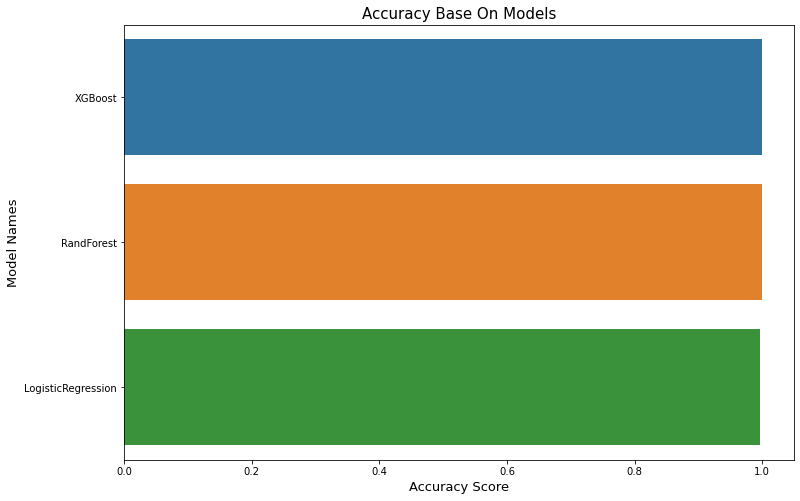

,model,accuracy
1,XGBoost,0.999
2,RandForest,0.999
0,LogisticRegression,0.996


In [22]:
# determine accuracy scores of LogisticRegression, XGBoost and RandomForest

mymodels = [lr, xgb, rfc]
model_names = ['LogisticRegression', 'XGBoost', 'RandForest']
acc_df = accuracy_score(mymodels, model_names)
order = acc_df.sort_values('accuracy', ascending=False).model

plt.figure(figsize=(12,8))
sns.barplot(data= acc_df, x='accuracy', y='model', order = order);
plt.title('Accuracy Base On Models', fontsize=15)
plt.xlabel('Accuracy Score', fontsize=13)
plt.ylabel('Model Names', fontsize=13);
plt.show()
acc_df.sort_values('accuracy', ascending=False)

### Using AUC scores with ML models to assess accuracy of prediction:

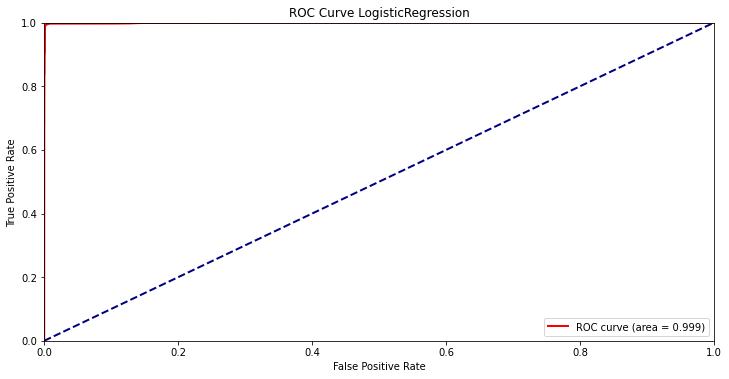

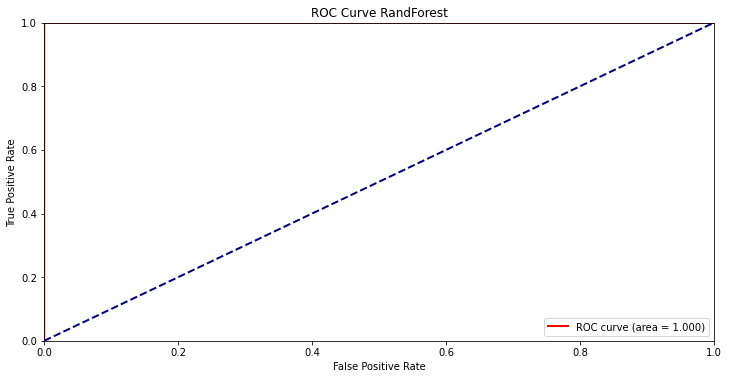

[08:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


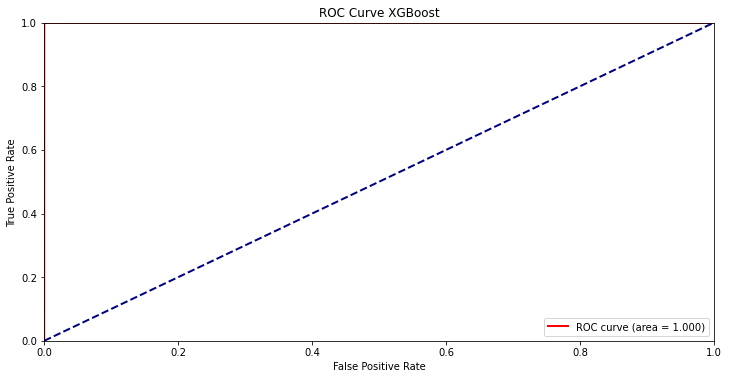

,model,auc score
1,RandForest,1.000
2,XGBoost,1.000
0,LogisticRegression,0.999


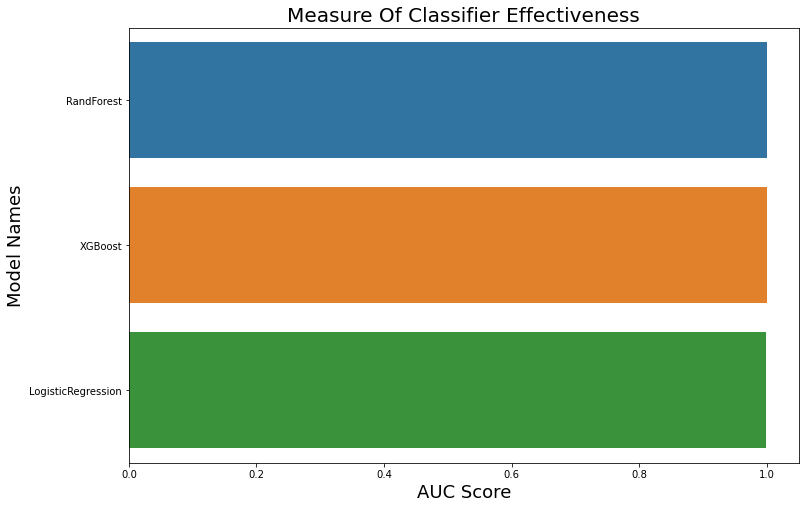

In [23]:
# plot auc curve for the 3 binary classifiers

mymodels = [lr, rfc, xgb]
model_names = ['LogisticRegression', 'RandForest', 'XGBoost']

auc_score(mymodels, model_names)

In [24]:
# fit data to Classifiers

sc = StandardScaler()
X_resampled = sc.fit_transform(X)
X_origin = sc.transform(df)

lr.fit(X_resampled,y)
df1['gender_lr'] = lr.predict(X_origin)

rfc.fit(X_resampled,y)
df1['gender_rfc'] = rfc.predict(X_origin)

xgb.fit(X_resampled,y)
df1['gender_xgb'] = xgb.predict(X_origin)

[08:55:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
# compare the gender counts according to the 3 binary classifiers

df1['gender_lr'].value_counts(), df1['gender_rfc'].value_counts(), df1['gender_xgb'].value_counts()

(1    146700
 0     44587
 Name: gender_lr, dtype: int64,
 1    147403
 0     43884
 Name: gender_rfc, dtype: int64,
 1    147391
 0     43896
 Name: gender_xgb, dtype: int64)

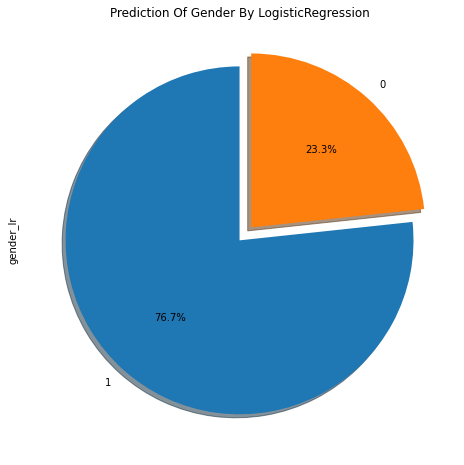

In [26]:
# plot the graph to show proportion of predicted females vs males shoppers (LogisticRegression)

plt.figure(figsize=(8,8))

explode=[0,0.1]

df1.gender_lr.value_counts().plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode)
plt.title('Prediction Of Gender By LogisticRegression')
plt.show()

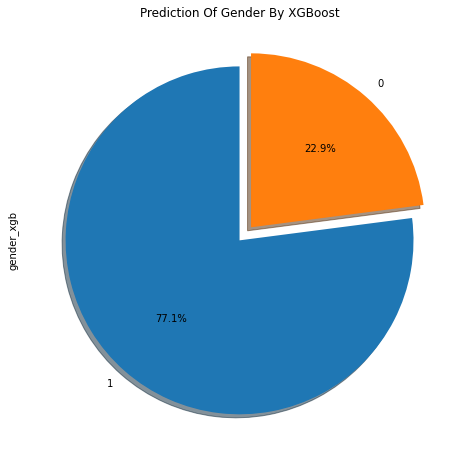

In [27]:
# plot the graph to show proportion of predicted females vs males shoppers (XGBoost)

plt.figure(figsize=(8,8))

explode=[0,0.1]

df1.gender_xgb.value_counts().plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode)
plt.title('Prediction Of Gender By XGBoost')
plt.show()

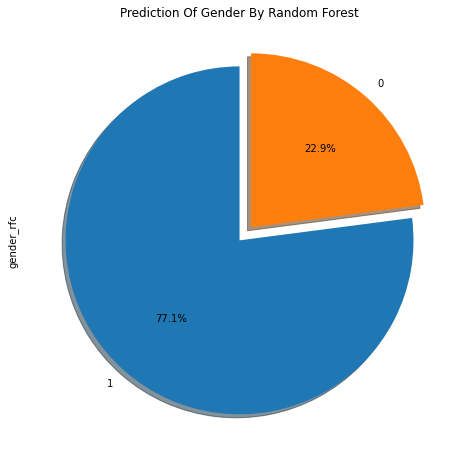

In [28]:
# plot the graph to show proportion of predicted females vs males shoppers (Random Forest)

plt.figure(figsize=(8,8))

explode=[0,0.1]

df1.gender_rfc.value_counts().plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode)
plt.title('Prediction Of Gender By Random Forest')
plt.show()

### Use Hypothesis testing to assess accuracy of prediction.  This is done by proving that the separated female and male datasets are significantly different from each other.

In [29]:
# Show column names in df1

df1.columns

Index(['wapp_items', 'wacc_items', 'wftw_items', 'mapp_items', 'macc_items',
       'mftw_items', 'unisex_items', 'sprt_items', 'gender', 'gender_lr',
       'gender_rfc', 'gender_xgb'],
      dtype='object')

In [30]:
# create new dataframe df_rfc to compare female and male dataset using Hypothesis

df_rfc = df1.drop(['gender',
       'gender_lr', 'gender_xgb'], axis=1)

In [31]:
# Show columns in df_rfc

df_rfc.columns

Index(['wapp_items', 'wacc_items', 'wftw_items', 'mapp_items', 'macc_items',
       'mftw_items', 'unisex_items', 'sprt_items', 'gender_rfc'],
      dtype='object')

In [32]:
# separate female and male into 2 dataframes

mdf = df_rfc[df_rfc['gender_rfc']==0]
fdf = df_rfc[df_rfc['gender_rfc']==1]

#### We reject the Null Hypothesis and conclude that the female & male datasets are significantly different from each other, thus indicating that gender type prediction is accurate.

In [33]:
# Null Hypothesis: there is no difference between female and male datasets for the 8 features.
# Alternative Hypothesis: there is difference between female and male datasets for the 8 features.
# If p value is below 0.05, we will reject null hypothesis in favor of alternative hypothesis.
# The conclusive result shows significant differences between female and male datasets when they were successfully separated.

from scipy import stats

addup = list()
for i in df_rfc.columns:
    j = stats.ttest_ind(mdf[i],fdf[i]).pvalue
    cast = {'test_stats': i, 'p_value': j}
    addup.append(cast)

pv = pd.DataFrame(data=addup, columns=['test_stats','p_value'])
pv.p_value = [float(i) for i in pv.p_value]
pv['hypothesis'] = ['reject' if p < 0.05 else 'fail to reject' for p in pv.p_value]
pv.sort_values('p_value', ascending=False)

,test_stats,p_value,hypothesis
6,unisex_items,2.094126e-15,reject
7,sprt_items,3.718729e-20,reject
0,wapp_items,0.000000e+00,reject
1,wacc_items,0.000000e+00,reject
2,wftw_items,0.000000e+00,reject
3,mapp_items,0.000000e+00,reject
4,macc_items,0.000000e+00,reject
5,mftw_items,0.000000e+00,reject
8,gender_rfc,0.000000e+00,reject


### Graphs indicate distribution of the 8 features to be significantly different between female and male dataset; proving that the gender prediction is accurate.

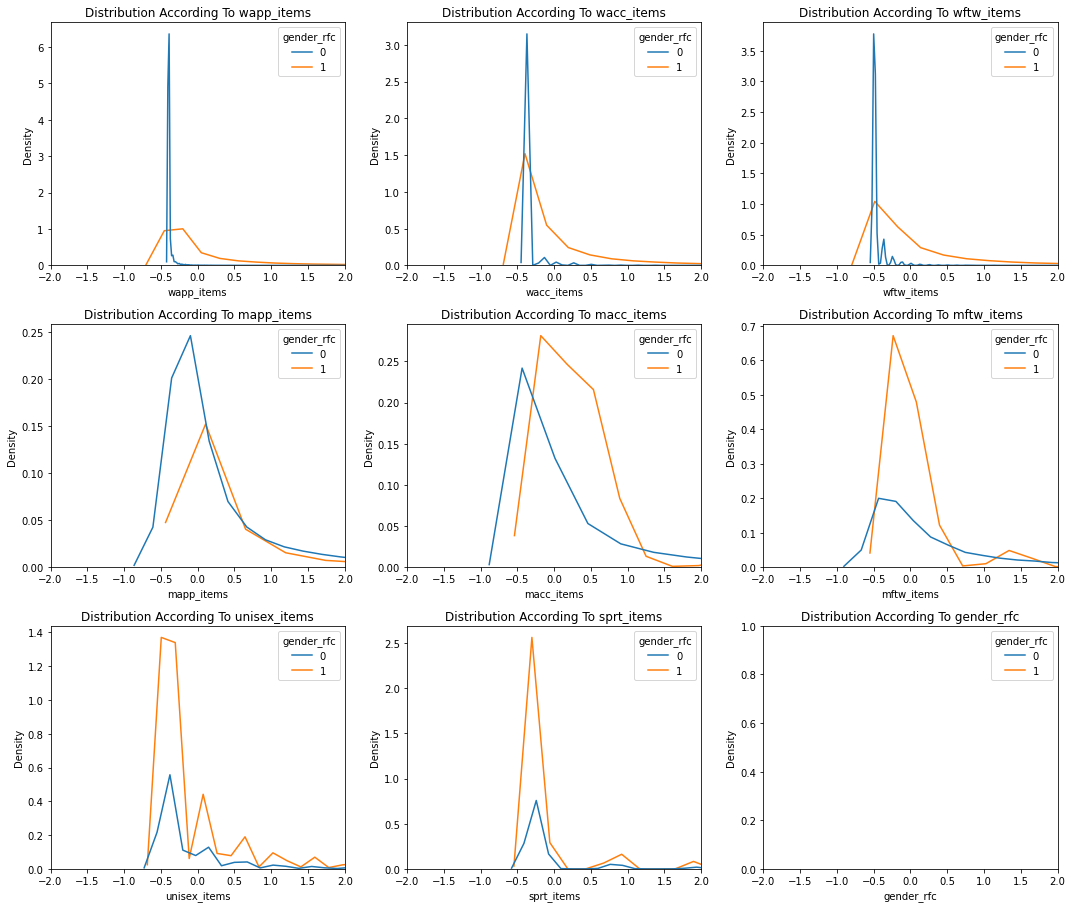

In [34]:
# Visualising the distribution of the 8 features between female and male datasets

df_rfc_drop_gender = df_rfc.drop('gender_rfc', axis=1)
# _=df1.drop('gender', axis=1)
_=normal(df_rfc)
_['gender_rfc'] = df_rfc.gender_rfc
plt.figure(figsize=(15,50))
h=1
for i in df_rfc.columns:
    plt.subplot(12,3,h)
    ax = sns.kdeplot(data=_, x=i, hue='gender_rfc')
    ax.set_xlim(-2,2)
    plt.title(f"Distribution According To {i}")
    h+=1
    
    plt.tight_layout()


## Enable Threshold Moving To Predict Gender Types (by using RandomForest)

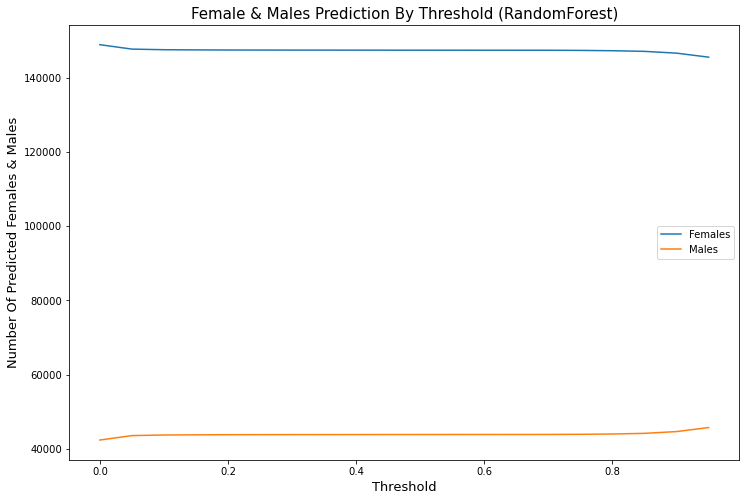

In [35]:
# visualise number of female and male prediction based on threshold levels

k =  np.arange(0,1,0.05)

probability = rfc.predict_proba(X_origin)[:,1]
addup_f, addup_m = list(), list()
for i in k:
    
    predicted = probability > i
    df_rfc['predict'] = predicted
    df_rfc['predict'] = [1 if i == True else 0 for i in df_rfc['predict'] ]
    f = df_rfc.predict.value_counts()[1]
    addup_f.append(f)
    m = df_rfc.predict.value_counts()[0]
    addup_m.append(m)

plt.figure(figsize=(12,8))
plt.plot(k, addup_f)
plt.plot(k, addup_m)
plt.title('Female & Males Prediction By Threshold (RandomForest)', fontsize=15)
plt.xlabel('Threshold', fontsize=13)
plt.ylabel('Number Of Predicted Females & Males', fontsize=13)
plt.legend(['Females','Males']);

## Output File

In [36]:
# create function to predict gender based on thresholds and output to a file

def predict_gender(X, sample, model3, threshold, model_name):

    probability = model3.predict_proba(X)[:,1]
    predicted = probability > threshold
    sample['predict'] = predicted
    sample['predict'] = [0 if i == False else 1 for i in sample['predict'] ]
    plt.figure(figsize=(8,8))
    sample['predict'].value_counts().plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode)
    plt.title(f'Prediction Of Gender By {model_name}', fontsize=15);
    return sample

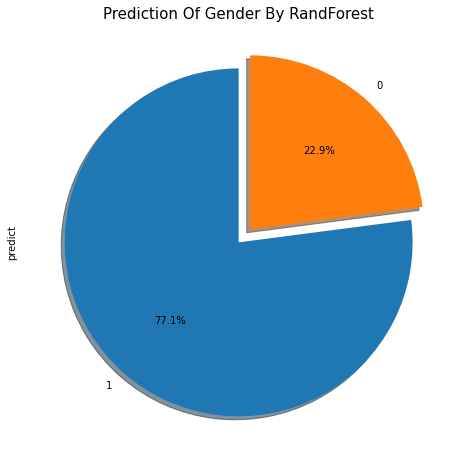

In [37]:
# prediction of proportion of female and male based on threshold input of 0.5

model_name = 'RandForest'
model = rfc
threshold = 0.5
sample = df1

df_predict = predict_gender(X_origin, sample, model, threshold, model_name)

In [38]:
df_predict.shape

(191287, 13)

In [39]:
df = pd.read_csv('sales.csv')
df['predict_gender'] = df_predict.predict

In [40]:
df

,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,returns,different_addresses,shipping_addresses,devices,vouchers,...,desktop_orders,android_orders,ios_orders,work_orders,home_orders,parcelpoint_orders,coupon_discount_applied,revenue,customer_id,predict_gender
0,2783,1487,N,2,5,0,0,2,1,0,...,2,0,0,0,0,0,0.0000,468.80,3.017001e+09,0
1,2772,1296,N,1,1,0,0,1,1,0,...,1,0,0,0,1,0,0.0091,109.09,3.017108e+09,0
2,2773,1929,N,4,4,0,0,2,1,0,...,4,0,0,0,0,0,0.0000,448.54,3.017126e+09,1
3,2767,6,Y,23,36,3,0,3,3,13,...,2,0,13,0,21,0,0.1723,1872.81,3.017185e+09,1
4,1430,826,N,2,6,0,0,2,1,0,...,2,0,0,0,2,0,0.0033,301.17,3.017193e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191282,2223,2223,Y,1,1,1,0,1,1,0,...,1,0,0,0,0,0,0.0000,163.63,3.706982e+09,0
191283,2234,2234,N,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0.0000,154.50,3.706984e+09,1
191284,2082,252,Y,9,25,6,0,4,2,6,...,6,0,3,4,3,0,0.1112,990.24,3.706994e+09,0
191285,2222,1063,Y,3,11,1,9,2,1,0,...,3,0,0,0,1,0,0.0000,679.65,3.706998e+09,0


In [41]:
df.predict_gender.value_counts()

1    147403
0     43884
Name: predict_gender, dtype: int64

# THANK YOU!